# Predicting the stock market

In this project, we'll work with data from the S&P500 Index. The S&P500 is a stock market index which aggregates the stock prices of `500` large companies.

We'll be using historical data on the price of the S&P500 Index to make predictions about future prices. 

## The Dataset

Each row in the file contains a daily record of the price of the S&P500 Index from `1950` to `2015`.

We'll develop a predictive model, train with data from `1950-2012` and try to make predictions from `2013-2015`.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
stocks = pd.read_csv('sphist.csv')
stocks.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883


In [3]:
stocks['Date'] = pd.to_datetime(stocks['Date'])

In [4]:
### Sorting from older to newer
stocks = stocks.sort_values(by='Date', ignore_index=True)
stocks.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,1950-01-03,16.66,16.66,16.66,16.66,1260000.0,16.66
1,1950-01-04,16.85,16.85,16.85,16.85,1890000.0,16.85
2,1950-01-05,16.93,16.93,16.93,16.93,2550000.0,16.93
3,1950-01-06,16.98,16.98,16.98,16.98,2010000.0,16.98
4,1950-01-09,17.08,17.08,17.08,17.08,2520000.0,17.08


## Generating Indicators

Here are some indicators that are interesting to generate for each row:

- The average price from the past `5` days


- The average price for the past `30` days


- The average price for the past `365` days


- The ratio between the average price for the past `5` days, and the average price for the past `365` days


- The standard deviation of the price over the past `5` days


- The standard deviation of the price over the past `365` days


- The ratio between the standard deviation for the past `5` days, and the standard deviation for the past `365` days

In [5]:
### Function to calculate the Moving Average (Rolling Mean)
def moving_average(df, ma=2):
    df = df.copy()
    for index, row in df.iloc[ma:].iterrows():
        df.loc[index, "MA{}".format(ma)] = df.loc[index-ma:index-1, "Close"].mean()
    
    return df["MA{}".format(ma)]

In [6]:
### Function to calculate Moving Standart Deviation
def moving_deviation(df, ma=2):
    df = df.copy()
    for index, row in df.iloc[ma:].iterrows():
        df.loc[index, "MA{}".format(ma)] = df.loc[index-ma:index-1, "Close"].std()
    
    return df["MA{}".format(ma)]

In [7]:
### Making some new columns
stocks["MA5"] = moving_average(stocks, ma=5)
stocks["MA30"] = moving_average(stocks, ma=30)
stocks["MA365"] = moving_average(stocks, ma=365)
stocks["MA5 - MA365"] = stocks["MA5"] - stocks["MA365"]

stocks["MDEV5"] = moving_deviation(stocks, ma=5)
stocks["MDEV30"] = moving_deviation(stocks, ma=30)
stocks["MDEV365"] = moving_deviation(stocks, ma=365)
stocks["MDEV5 - MDEV365"] = stocks["MDEV5"] - stocks["MDEV365"]

stocks

,Date,Open,High,Low,Close,Volume,Adj Close,MA5,MA30,MA365,MA5 - MA365,MDEV5,MDEV30,MDEV365,MDEV5 - MDEV365
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,1.260000e+06,16.660000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,1.890000e+06,16.850000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,2.550000e+06,16.930000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,2.010000e+06,16.980000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1950-01-09,17.080000,17.080000,17.080000,17.080000,2.520000e+06,17.080000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16585,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883,2087.024023,2073.984998,2035.531178,51.492845,3.916109,24.654181,64.370261,-60.454152
16586,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010,2090.231982,2076.283993,2035.914082,54.317900,7.956808,23.970453,64.352527,-56.395718
16587,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117,2088.306006,2077.908659,2036.234356,52.071650,9.333599,22.378095,64.277554,-54.943955
16588,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941,2080.456006,2078.931331,2036.507343,43.948663,19.599946,20.183769,64.121622,-44.521676


In [8]:
### Drop information for the first (1950) year containing NaNs
stocks = stocks.dropna().reset_index()
stocks

,index,Date,Open,High,Low,Close,Volume,Adj Close,MA5,MA30,MA365,MA5 - MA365,MDEV5,MDEV30,MDEV365,MDEV5 - MDEV365
0,365,1951-06-19,22.020000,22.020000,22.020000,22.020000,1.100000e+06,22.020000,21.800000,21.703333,19.447726,2.352274,0.256223,0.473595,1.790253,-1.534031
1,366,1951-06-20,21.910000,21.910000,21.910000,21.910000,1.120000e+06,21.910000,21.900000,21.683000,19.462411,2.437589,0.213659,0.444648,1.789307,-1.575648
2,367,1951-06-21,21.780001,21.780001,21.780001,21.780001,1.100000e+06,21.780001,21.972000,21.659667,19.476274,2.495726,0.092574,0.411452,1.788613,-1.696038
3,368,1951-06-22,21.549999,21.549999,21.549999,21.549999,1.340000e+06,21.549999,21.960000,21.631000,19.489562,2.470438,0.115108,0.368514,1.787659,-1.672551
4,369,1951-06-25,21.290001,21.290001,21.290001,21.290001,2.440000e+06,21.290001,21.862000,21.599000,19.502082,2.359918,0.204132,0.329130,1.786038,-1.581905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16220,16585,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883,2087.024023,2073.984998,2035.531178,51.492845,3.916109,24.654181,64.370261,-60.454152
16221,16586,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010,2090.231982,2076.283993,2035.914082,54.317900,7.956808,23.970453,64.352527,-56.395718
16222,16587,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117,2088.306006,2077.908659,2036.234356,52.071650,9.333599,22.378095,64.277554,-54.943955
16223,16588,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941,2080.456006,2078.931331,2036.507343,43.948663,19.599946,20.183769,64.121622,-44.521676


## Making Predictions

In [9]:
### Function to train&test model and return RMSE and trained model
def train_test(df, model):
    train = stocks[stocks["Date"].dt.year < 2013]
    test = stocks[stocks["Date"].dt.year >= 2013]
    features_train = train.drop(columns=['index', 'Close', 'High', 'Low', 'Open', 'Volume', 'Adj Close', 'Date'])
    features_test = test.drop(columns=['index', 'Close', 'High', 'Low', 'Open', 'Volume', 'Adj Close', 'Date'])
    model.fit(features_train, train['Close'])
    predictions = model.predict(features_test)
    
    mse = mean_squared_error(test['Close'], predictions)
    rmse = np.sqrt(mse)
    return rmse, model



In [10]:
model = LinearRegression()
rmse, model = train_test(stocks, model)
rmse

22.203881310230067

Linear Model shows RMSE equal 22.2$ which is comparable with daily volatility.

Let's check how features are correlated with the price to see whether we can drop some of columns.

In [11]:
stocks.corr()["Close"]

index              0.872733
Open               0.999900
High               0.999953
Low                0.999956
Close              1.000000
Volume             0.772817
Adj Close          1.000000
MA5                0.999793
MA30               0.999189
MA365              0.988870
MA5 - MA365        0.380477
MDEV5              0.722414
MDEV30             0.778583
MDEV365            0.816103
MDEV5 - MDEV365   -0.790039
Name: Close, dtype: float64

Seems like every column has a big impact.

Let's see how does the price graph look like and create a function which will predict prices beyond our dataset for the future basing on own predicted values in every iteration.

<AxesSubplot:>

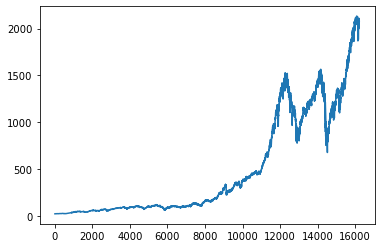

In [12]:
%matplotlib inline
stocks["Close"].plot()

In [13]:
### Function which forecasts stock in given days forward based on predicted values in each iteration
def forecast(data, model, forward=1):
    df = data.copy()
    for i in range(forward):
        feature = df.drop(columns=['index', 'Close', 'High', 'Low', 'Open', 'Volume', 'Adj Close', 'Date'])
        feature = feature.iloc[-2:-1]
        prediction = float(model.predict(feature))
        index = df.index[-1] + 1
        df = df.append({
                        'Close': prediction,
                        'MA5': df.loc[index-5:index-1, "Close"].mean(),
                        'MA30': df.loc[index-30:index-1, "Close"].mean(),
                        'MA365': df.loc[index-365:index-1, "Close"].mean(), 
                        'MDEV5': df.loc[index-5:index-1, "Close"].std(),
                        'MDEV30': df.loc[index-30:index-1, "Close"].std(),
                        'MDEV365': df.loc[index-365:index-1, "Close"].std(),
                       }, ignore_index=True)

        df.loc[index, 'MA5 - MA365'] = df.loc[index, "MA5"] - df.loc[index, "MA365"]
        df.loc[index, "MDEV5 - MDEV365"] = df.loc[index, "MDEV5"] - df.loc[index, "MDEV365"]
    
    return df

In [14]:
forward_stock = forecast(stocks, model, forward=5)
forward_stock

,index,Date,Open,High,Low,Close,Volume,Adj Close,MA5,MA30,MA365,MA5 - MA365,MDEV5,MDEV30,MDEV365,MDEV5 - MDEV365
0,365.0,1951-06-19,22.020000,22.020000,22.020000,22.020000,1100000.0,22.020000,21.800000,21.703333,19.447726,2.352274,0.256223,0.473595,1.790253,-1.534031
1,366.0,1951-06-20,21.910000,21.910000,21.910000,21.910000,1120000.0,21.910000,21.900000,21.683000,19.462411,2.437589,0.213659,0.444648,1.789307,-1.575648
2,367.0,1951-06-21,21.780001,21.780001,21.780001,21.780001,1100000.0,21.780001,21.972000,21.659667,19.476274,2.495726,0.092574,0.411452,1.788613,-1.696038
3,368.0,1951-06-22,21.549999,21.549999,21.549999,21.549999,1340000.0,21.549999,21.960000,21.631000,19.489562,2.470438,0.115108,0.368514,1.787659,-1.672551
4,369.0,1951-06-25,21.290001,21.290001,21.290001,21.290001,2440000.0,21.290001,21.862000,21.599000,19.502082,2.359918,0.204132,0.329130,1.786038,-1.581905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16225,NaN,NaT,NaN,NaN,NaN,2077.578077,NaN,NaN,2080.104004,2080.301335,2037.197781,42.906222,19.877589,19.662414,63.956554,-44.078966
16226,NaN,NaT,NaN,NaN,NaN,2077.744399,NaN,NaN,2075.093643,2080.514606,2037.517283,37.576360,15.442803,19.594648,63.865879,-48.423076
16227,NaN,NaT,NaN,NaN,NaN,2077.009967,NaN,NaN,2074.740521,2080.909756,2037.839240,36.901280,15.336389,19.408196,63.771325,-48.434936
16228,NaN,NaT,NaN,NaN,NaN,2072.375805,NaN,NaN,2080.218491,2080.465085,2038.123323,42.095168,6.420558,19.337136,63.714050,-57.293492


<AxesSubplot:>

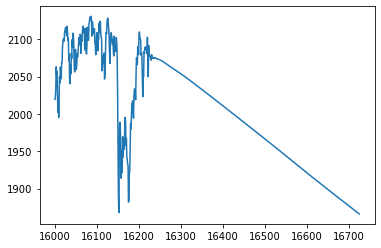

In [15]:
forecast(stocks, model, forward=500).loc[16000:, "Close"].plot()

Linear Regressor shows unrealistic behavior of stock market, so we might predict only few days forward. Let's check how good do other linear models perform.

In [16]:
from sklearn.linear_model import Lasso
model = Lasso()
rmse, model = train_test(stocks, model)
rmse

C:\Users\Pel_MRK\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 571044.2592766809, tolerance: 352425.54163909977
  model = cd_fast.enet_coordinate_descent(


22.150293993688177

In [18]:
from sklearn.linear_model import ElasticNet
model = ElasticNet()
rmse, model = train_test(stocks, model)
rmse

C:\Users\Pel_MRK\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 713496.6109161268, tolerance: 352425.54163909977
  model = cd_fast.enet_coordinate_descent(


22.142062387866478

In [20]:
from sklearn.linear_model import Ridge
model = Ridge()
rmse, model = train_test(stocks, model)
rmse

22.203880637521376

All linear models give similar results. ElasticNet has the lowest error equal 22.14$.

Let's train ensemble model and see how good it would perform and how does its graph look like.

In [32]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, min_samples_split=50, random_state=1)
rmse, model = train_test(stocks, model)
rmse

388.70165583720126

<AxesSubplot:>

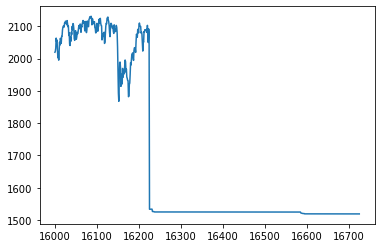

In [44]:
forecast(stocks, model, forward=500).loc[16000:, "Close"].plot()

Surprisingly to me, quickly-set-up Random Forest Algorithm performs 10 times worse than Linear Models do. 

## Conclusions 

We've worked with time series data and explored some solution for prediction. The best performed model was linear ElasticNet with Root Mean Square Error equal 22.14$ which may be comparable with common daily volatility. The model predictions are working only for a few days forward.